<img src="../static/logo.png" alt="datio" style="width: 200px "align="right"/>

## EJERCICIO 1: Cargar los tres ficheros indicados

In [1]:
import matplotlib.pyplot as plt;
#The plots in this document are made using matplotlib’s ggplot style (new in version 1.4):
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
import pandas as pd

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## 1.1 Carga el fichero csv : Base_evolucion_fondos.csv
 Contiene la información a nivel gestor por cada segmento global de la evolución del saldo en fondos mes a mes

,COD_USUARIO,COD_SEGLOBAL,fondos_201507,fondos_201508,fondos_201509,fondos_201510,fondos_201511,fondos_201512
0,E000170,NaN,0.00,0.00,0.00,0.00,0.00,0.00
1,E000170,34.0,0.00,0.00,0.00,0.00,0.00,0.00
2,E000170,35.0,0.00,0.00,0.00,0.00,0.00,0.00
3,E000170,36.0,0.00,0.00,0.00,0.00,0.00,0.00
4,E000170,37.0,11684.42,11673.35,11675.79,11687.85,11696.99,11687.41


## 1.2 Carga el fichero csv : Base_puesto_gestores.csv
Contiene el tipo de puesto de cada gestor

,COD_USUARIO,tipo_puesto
0,E000170,GP
1,E000501,AF
2,E000531,AF
3,E000545,AF
4,E000558,AF


## 1.3 Carga el fichero csv : txc_aport_extr_fondos.csv
Transacciones por canal (TxC) (octubre, noviembre, diciembre 2015) de aport. ext a fondos en oficina

,cod_ofictrn,imp_trans,cod_user,cod_npuesto,cod_persona,hms_soli_trn,cod_trnfims,cod_medio_dv,cod_canal_dv,cod_serv_dv,cod_geve_trn,cod_eve_trn,cod_deve_trn
0,1557,5000.0,U044181,2,5133579,2015-12-03 16:47:11.0,DSFIT008,1,1,1,3,37,73
1,2585,13000.0,E018157,3,23783944,2015-12-23 10:46:00.0,DSFIT008,1,1,1,3,37,73
2,2626,19000.0,UA16687,1,12024444,2015-12-17 10:25:51.0,DSFIT008,1,1,1,3,37,73
3,2738,10000.0,U215376,7,3771392,2015-12-17 11:36:26.0,DSFIT008,1,1,1,3,37,73
4,1575,20000.0,U230725,2,3575357,2015-12-03 12:49:46.0,DSFIT008,1,1,1,3,37,73


## EJERCICIO 2: Transformaciones básicas

### 2.1 Obtener los valores únicos de la columna tipo_puesto

array(['GP', 'AF', 'GD', 'AFR', 'DO3', 'DC', 'AP', 'DO2', 'DGR', 'DCBC',
       'DO', 'APR'], dtype=object)

### 2.2 Incluir una columna con el significado del tipo de gestor: 'tipo_puesto_def'   
(GP: Gestor_pymes, AF: Asesor_Financiero, GD : Gestor_Directo, AFR : Asesor_Financiero_Remoto, 
DO3 : Asesor_Financiero_Remoto3 , DC : , AP : Asesor_Patrimonial , DO3 : Asesor_Financiero_Remoto2 , 
DGR : Director_General_Remoto, DCBC : Director_de_CBC, DO : Drector_Oficina, APR : Asesor_Financiero_Remoto)

In [7]:
di_gestores = {"GP": "Gestor_pymes", "AF": "Asesor_Financiero","GD":"Gestor_Directo",
               "AFR":"Asesor_Financiero_Remoto", "DO3":"Asesor_Financiero_Remoto 3",
               "DC":"Director_Comercial","AP": "Asesor_Patrimonial","DO3":"Asesor_Financiero_Remoto 2",
               "DGR":"Director_General_Remoto","DCBC":"Director_de_CBC", "DO":"Drector_Oficina",
               "APR":"Asesor_Financiero_Remoto"}

,COD_USUARIO,tipo_puesto,tipo_puesto_def
0,E000170,GP,Gestor_pymes
1,E000501,AF,Asesor_Financiero
2,E000531,AF,Asesor_Financiero
3,E000545,AF,Asesor_Financiero
4,E000558,AF,Asesor_Financiero


### 2.3 Añadir una columna "day_month" con el día del mes de la transacción
Nota: la columna se creará de tipo numérico

,cod_ofictrn,imp_trans,cod_user,cod_npuesto,cod_persona,hms_soli_trn,cod_trnfims,cod_medio_dv,cod_canal_dv,cod_serv_dv,cod_geve_trn,cod_eve_trn,cod_deve_trn,day_month
0,1557,5000.0,U044181,2,5133579,2015-12-03 16:47:11.0,DSFIT008,1,1,1,3,37,73,3
1,2585,13000.0,E018157,3,23783944,2015-12-23 10:46:00.0,DSFIT008,1,1,1,3,37,73,23
2,2626,19000.0,UA16687,1,12024444,2015-12-17 10:25:51.0,DSFIT008,1,1,1,3,37,73,17
3,2738,10000.0,U215376,7,3771392,2015-12-17 11:36:26.0,DSFIT008,1,1,1,3,37,73,17
4,1575,20000.0,U230725,2,3575357,2015-12-03 12:49:46.0,DSFIT008,1,1,1,3,37,73,3


## 2.4 Renombrar la columna cod_user

['cod_ofictrn',
 'imp_trans',
 'COD_USUARIO',
 'cod_npuesto',
 'cod_persona',
 'hms_soli_trn',
 'cod_trnfims',
 'cod_medio_dv',
 'cod_canal_dv',
 'cod_serv_dv',
 'cod_geve_trn',
 'cod_eve_trn',
 'cod_deve_trn',
 'day_month']

### EJERCICIO 3: Queries sencillas

### 3.1 ¿Cuantos gestores tienen el tipo de puesto 'AF'?

728

### 3.2 Muestra las últimas dos aportaciones del usuario UA16687

,cod_ofictrn,imp_trans,COD_USUARIO,cod_npuesto,cod_persona,hms_soli_trn,cod_trnfims,cod_medio_dv,cod_canal_dv,cod_serv_dv,cod_geve_trn,cod_eve_trn,cod_deve_trn,day_month
2105,2626,10000.0,UA16687,1,1616852,2015-11-24 14:36:16.0,DSFIT008,1,1,1,3,37,73,24
2,2626,19000.0,UA16687,1,12024444,2015-12-17 10:25:51.0,DSFIT008,1,1,1,3,37,73,17


###  3.3 Cuenta los usuarios cuyo cod_usuario comienza por 'UA'

Ayuda: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.startswith.html

133

,COD_USUARIO,tipo_puesto,tipo_puesto_def
0,E000170,GP,Gestor_pymes
1,E000501,AF,Asesor_Financiero
2,E000531,AF,Asesor_Financiero
3,E000545,AF,Asesor_Financiero
4,E000558,AF,Asesor_Financiero


### 3.4 Dibuja un gráfico de barras con el número de usarios de cada tipo de puesto (usar la definició de puesto no las siglas)

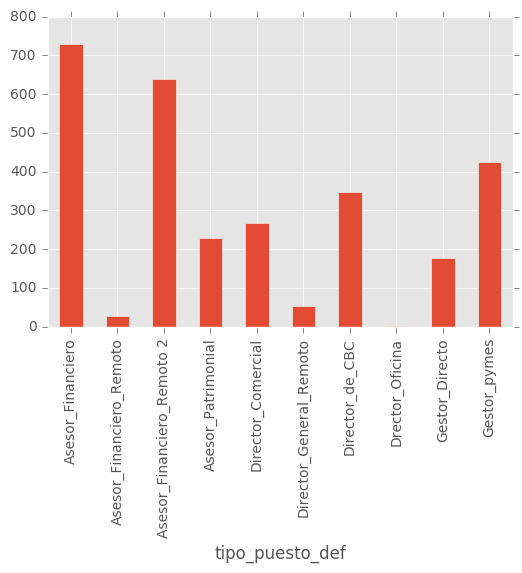

### EJERCICIO 4: Indicar para cada usuario los tres segmentos globales con mayor cantidad de saldo en fondos

COD_USUARIO  COD_SEGLOBAL
E000170      43.0            9.392887e+05
             42.0            3.286307e+05
             37.0            7.010581e+04
E000501      43.0            3.453175e+07
             42.0            7.027181e+06
             56.0            4.335048e+05
E000531      43.0            3.807259e+07
             42.0            1.464705e+07
             55.0            4.794893e+05
E000545      43.0            1.908091e+07
             42.0            4.142704e+06
             36.0            1.140088e+06
E000558      43.0            1.118869e+07
             42.0            1.926131e+06
             61.0            8.495328e+04
E000575      43.0            8.604421e+06
             42.0            4.474740e+06
             56.0            3.683971e+04
E000766      43.0            4.895803e+07
             42.0            1.687696e+07
             56.0            7.166371e+05
E000839      35.0            5.676835e+06
             34.0            4.707873e+06
        

### EJERCICIO 5: Top 10 de gestores, para un conjunto del segmento global, que tengan mayor cantidad de importe en fondos para el segmento global = 41

fondos_201507  fondos_201508  fondos_201509  \
COD_SEGLOBAL COD_USUARIO                                                
41.0         U074939        50612990.48    50082028.12    49617645.70   
             U098194        36135799.24    36481821.01    35557226.28   
             U216094        24223961.66    23576208.17    23674361.65   
             U075773        20243420.59    20342977.70    19454095.04   
             U076208        20475090.94    20155057.26    19448108.27   
             U089882        19953758.31    19650520.73    19453634.92   
             U083994        21613261.17    21380378.60    21134634.73   
             U076295        21400305.80    20747688.79    17422631.38   
             U079152        19358754.05    18902928.77    17205118.11   
             U082720        19181337.20    18608132.61    17268472.26   

                          fondos_201510  fondos_201511  fondos_201512  \
COD_SEGLOBAL COD_USUARIO                                                
41.0         U074939        49809970.95    48177541.14    45964949.26   
             U098194        36119304.92    36083203.97    35601321.24   
             U216094        23575574.66    23545516.51    22133630.75   
             U075773        21161802.27    21159628.30    20034096.46   
             U076208        20482527.73    20297080.82    20566712.16   
             U089882        19796203.75    20044190.40    18898109.88   
             U083994        21479010.09    14214378.48    14075185.08   
             U076295        17718973.10    17161082.33    16859482.96   
             U079152        16961033.40    17021377.54    17630296.31   
             U082720        17562245.65    17293477.91    16641108.80   

                                 TOTAL  
COD_SEGLOBAL COD_USUARIO                
41.0         U074939      2.942651e+08  
             U098194      2.159787e+08  
             U216094      1.407293e+08  
             U075773      1.223960e+08  
             U076208      1.214246e+08  
             U089882      1.177964e+08  
             U083994      1.138968e+08  
             U076295      1.113102e+08  
             U079152      1.070795e+08  
             U082720      1.065548e+08

### EJERCICIO 6: Top 10 de gestores, para un conjunto del segmento global, que tengan una mayor evolución en saldo en fondos con cod_seglobal= 41
Evolucion: Porcentaje de aumento en el importe gestionado entre Julio y Diciembre del 2015

,COD_USUARIO,EVOLUCION
0,U223387,inf
1,E025561,inf
2,U231924,inf
3,U098042,inf
4,E023639,inf
5,U500885,inf
6,U094936,inf
7,U084596,1.248689
8,U089555,1.096038
9,U095050,1.082999


### EJERCICIO 7: Top 10 de gestores con mayor número de aportaciones extraordinarias (a clientes distintos) en los primeros 15 días de cada mes

,cod_persona,imp_trans
COD_USUARIO,,
U093761,52421717,9877691.00
U230104,14735059,1633000.00
U220043,114064293,1582287.00
U501998,2155214,1500000.00
U080359,31196236,1044132.35
U100642,6871073,840000.00
U100728,15989772,796600.00
UA45884,28832655,604317.56
U076651,20413593,545000.00


### EJERCICIO 8 : Crear una tabla donde a nivel usuario se muestre la evolucion total en fondos por meses, la cantidad total en fondos del 2015, el número de aportaciones realizadas por sus clientes, y la cantidad total de las aportaciones. A continuación sacar el top 3 de los usarios con mayor número de aportaciones y mayor cantidad en fondos


,COD_USUARIO,fondos_201507,fondos_201508,fondos_201509,fondos_201510,fondos_201511,fondos_201512,TOTAL_fondos,sum,count
0,E000170,238959.81,230965.65,227097.31,235378.62,215052.60,190571.27,1338025.26,0.00,0.0
1,E000501,7304071.91,7260667.28,6996654.32,7267362.44,7292380.28,7200498.79,43321635.02,35300.00,4.0
2,E000531,8922207.79,8863190.47,8756312.27,9063717.45,9073612.70,9034238.44,53713279.12,82545.58,4.0
3,E000545,4310206.62,4143844.35,4029787.49,4176219.56,4193680.12,4169364.83,25023102.97,7000.00,1.0
4,E000558,2263893.07,2187550.22,2178721.35,2229827.63,2182948.17,2199294.07,13242234.51,12000.00,1.0
5,E000575,2151412.06,2104763.38,2070488.12,2293190.23,2265791.65,2230355.15,13116000.59,0.00,0.0
6,E000766,11306802.88,10991361.39,10797583.55,11091367.51,11331572.02,11208538.93,66727226.28,67000.00,4.0
7,E000839,3244512.37,3129677.75,2812166.74,2892312.03,2904498.44,2917700.18,17900867.51,0.00,0.0
8,E001223,3266472.69,3248431.88,3202675.66,3292650.13,3282791.84,3358975.84,19651998.04,80000.00,1.0
9,E017652,7154309.73,7039854.15,6979239.74,7245616.78,7175527.01,7006707.88,42601255.29,57000.00,5.0


,COD_USUARIO,fondos_201507,fondos_201508,fondos_201509,fondos_201510,fondos_201511,fondos_201512,TOTAL_fondos,sum,count
2636,U220043,44480443.79,42555376.54,42068648.45,45704089.22,49044642.68,48962369.57,2.728156e+08,2266843.73,32.0
2094,U098194,50712511.54,50697427.95,49341140.74,50367765.39,51094440.22,49666678.92,3.018800e+08,16500.00,1.0
700,U074939,77135176.95,76046044.14,74468893.65,75759696.94,73386402.74,69688685.39,4.464849e+08,0.00,0.0


## EJERCICIO 9 : Cuales son los 3 tipos de puesto que manejan mayor cantidad de fondos en media por mes


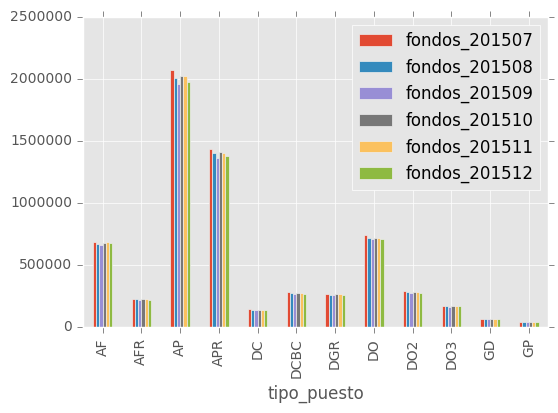